## **😀경제지표에 따른 서울시 교통량 예측하기😀**

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
data=pd.read_csv("../00_Data/Integrated_data/Fully_integrated_data.csv",encoding="utf-8")
data.head()

,Date,Total Traffic Volume,Base Interest Rate,Exchange Rate,Gross Domestic Product (GDP),Economic Growth Rate (Real GDP Growth Rate),Export price,Export growth rate,Import price,Import growth rate,Nationwide Consumer Price Index,Regular Unleaded Gasoline,Diesel Fuel for Automobiles,number of car ownership
0,2011-01-01,5466446.0,2.75,1121.500000,328096.0,5.4,44465366.00,44.700000,41981323.00,13.600000,90.448000,1814.57,1611.14,18409608
1,2011-01-02,5059821.0,2.75,1121.732258,328096.0,5.4,44269519.60,43.775943,41799132.37,13.521635,90.397806,1815.24,1611.79,18398782
2,2011-01-03,5631394.0,2.75,1121.964516,328096.0,5.4,44073673.20,42.851885,41616941.74,13.443269,90.347613,1816.15,1612.85,18387956
3,2011-01-04,5584995.0,2.75,1122.196774,328096.0,5.4,43877826.79,41.927828,41434751.11,13.364904,90.297419,1817.48,1614.02,18377130
4,2011-01-05,5742955.0,2.75,1122.429032,328096.0,5.4,43681980.39,41.003771,41252560.48,13.286539,90.247226,1818.53,1615.00,18366304


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Date                                         4746 non-null   object 
 1   Total Traffic Volume                         4746 non-null   float64
 2   Base Interest Rate                           4746 non-null   float64
 3   Exchange Rate                                4746 non-null   float64
 4   Gross Domestic Product (GDP)                 4746 non-null   float64
 5   Economic Growth Rate (Real GDP Growth Rate)  4746 non-null   float64
 6   Export price                                 4746 non-null   float64
 7   Export growth rate                           4746 non-null   float64
 8   Import price                                 4746 non-null   float64
 9   Import growth rate                           4746 non-null   float64
 10  

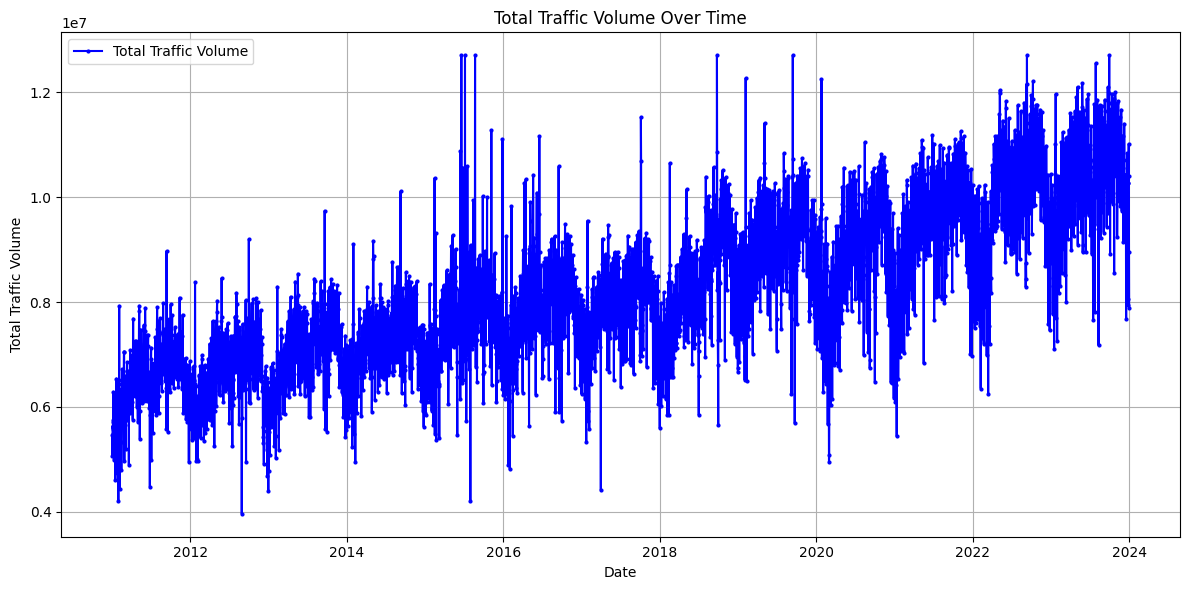

In [22]:
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Plotting the Total Traffic Volume over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Total Traffic Volume'], label='Total Traffic Volume', color='blue', marker='o', linestyle='-', markersize=2)
plt.title('Total Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Traffic Volume')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

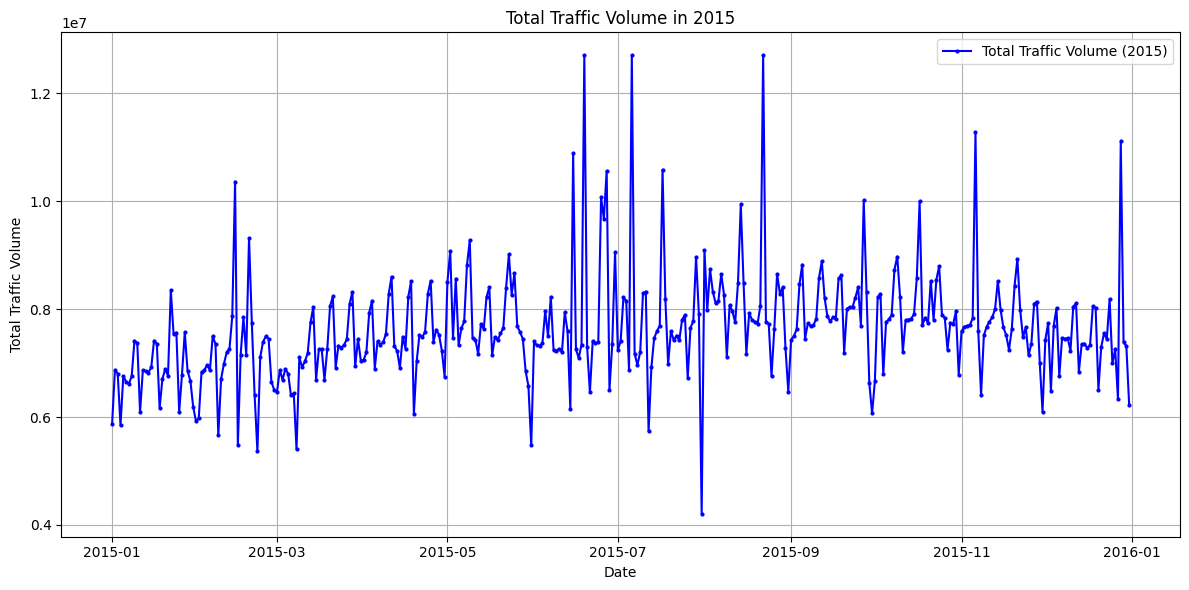

In [23]:
# Filter the data for the year 2015
data_2015 = data[data['Date'].dt.year == 2015]

# Plotting the Total Traffic Volume for the year 2015
plt.figure(figsize=(12, 6))
plt.plot(data_2015['Date'], data_2015['Total Traffic Volume'], label='Total Traffic Volume (2015)', color='blue', marker='o', linestyle='-', markersize=2)
plt.title('Total Traffic Volume in 2015')
plt.xlabel('Date')
plt.ylabel('Total Traffic Volume')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
#추석, 연말에 높아지는 경향

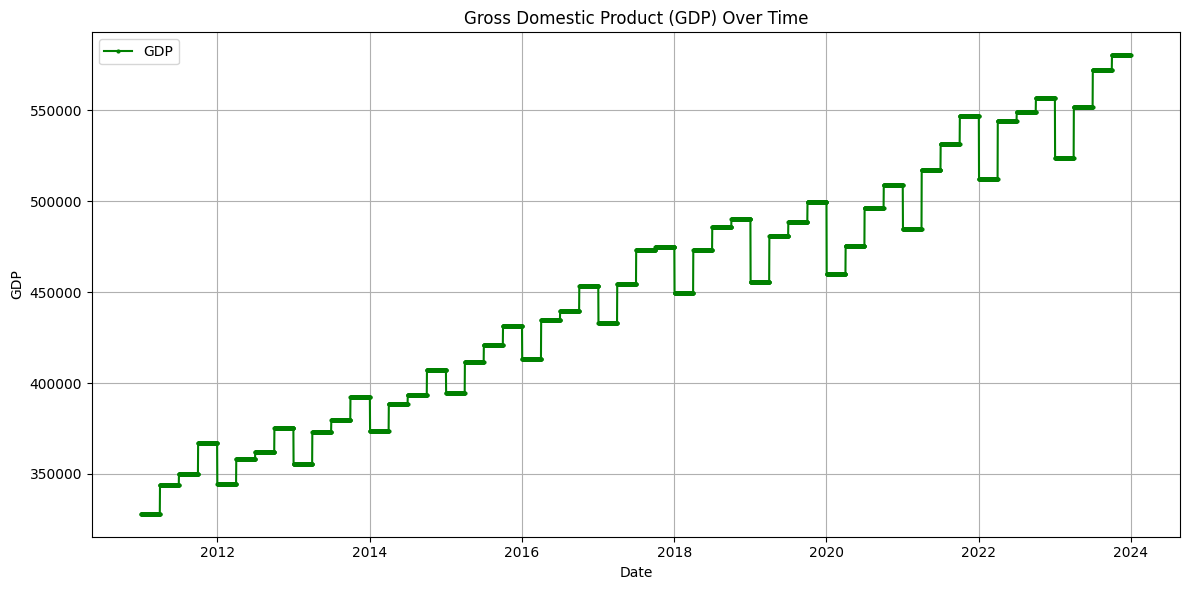

In [25]:
# Plotting the GDP over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Gross Domestic Product (GDP)'], label='GDP', color='green', marker='o', linestyle='-', markersize=2)
plt.title('Gross Domestic Product (GDP) Over Time')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

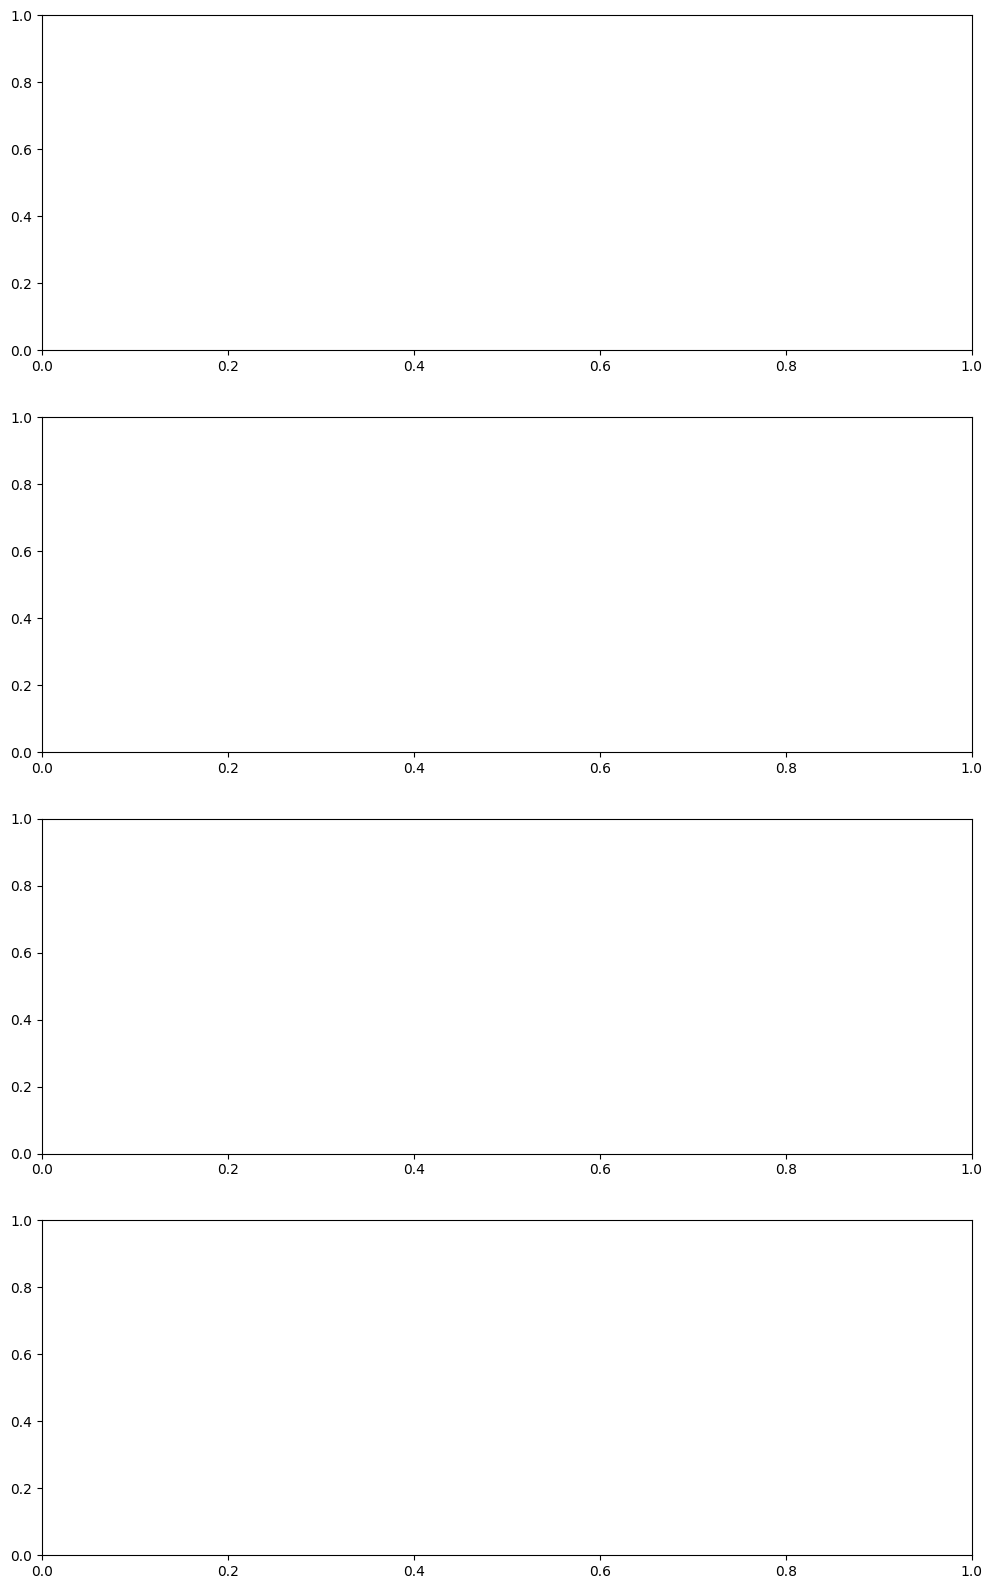

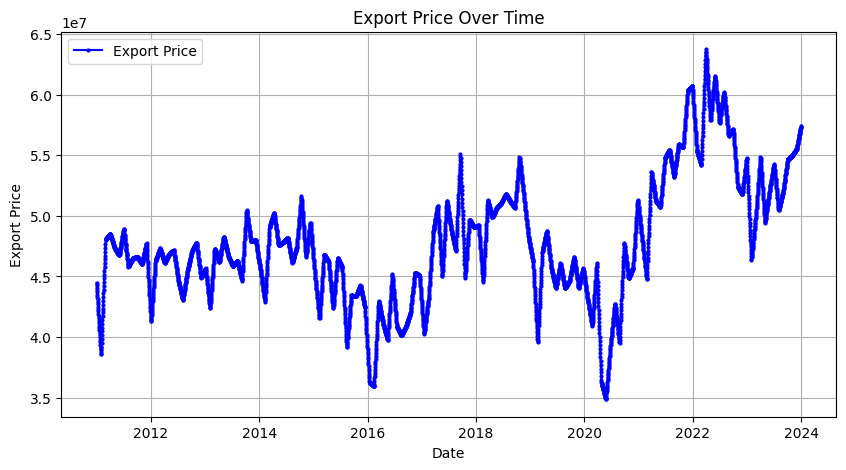

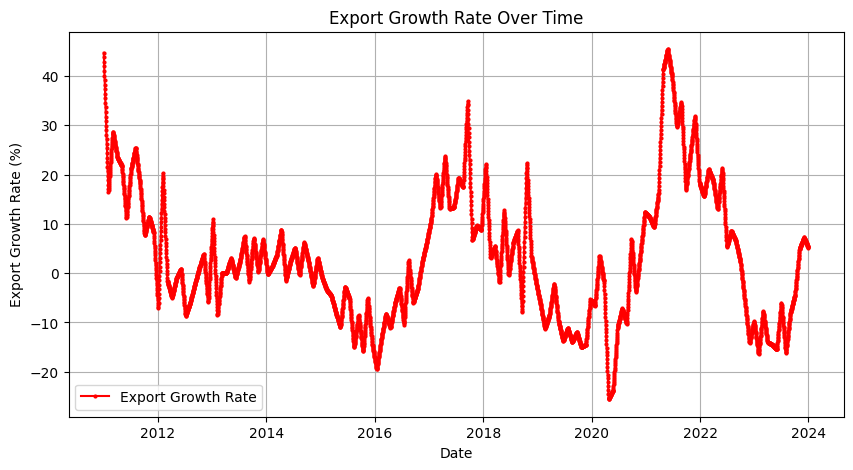

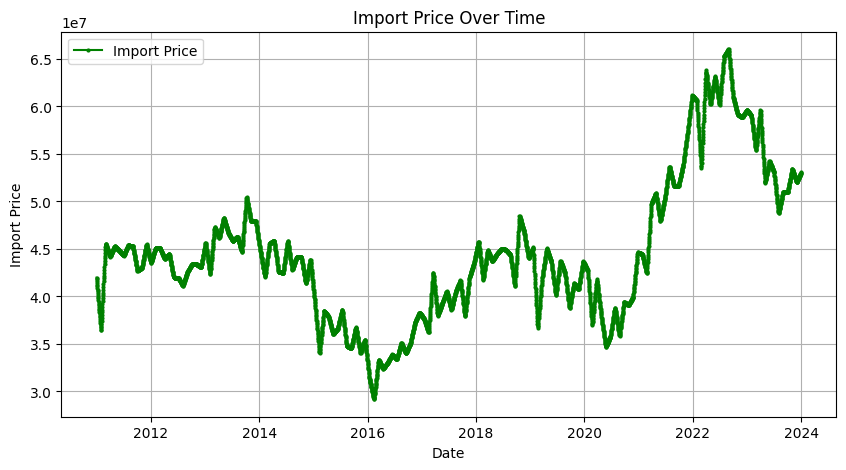

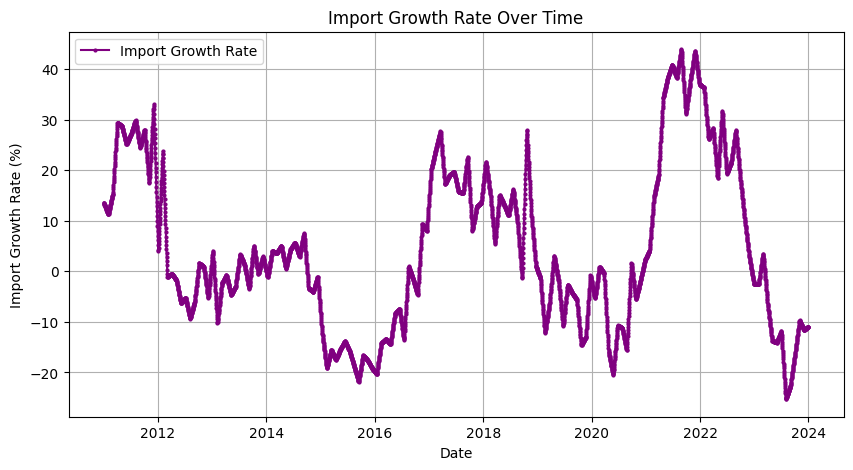

In [26]:
# Create a figure with four subplots
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12, 20))

# Plotting Export Price
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Export price'], label='Export Price', color='blue', marker='o', linestyle='-', markersize=2)
plt.title('Export Price Over Time')
plt.xlabel('Date')
plt.ylabel('Export Price')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Export Growth Rate
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Export growth rate'], label='Export Growth Rate', color='red', marker='o', linestyle='-', markersize=2)
plt.title('Export Growth Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Export Growth Rate (%)')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Import Price
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Import price'], label='Import Price', color='green', marker='o', linestyle='-', markersize=2)
plt.title('Import Price Over Time')
plt.xlabel('Date')
plt.ylabel('Import Price')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Import Growth Rate
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Import growth rate'], label='Import Growth Rate', color='purple', marker='o', linestyle='-', markersize=2)
plt.title('Import Growth Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Import Growth Rate (%)')
plt.grid(True)
plt.legend()
plt.show()

In [27]:
df_cleaned = data.dropna(inplace=True)
df_cleaned

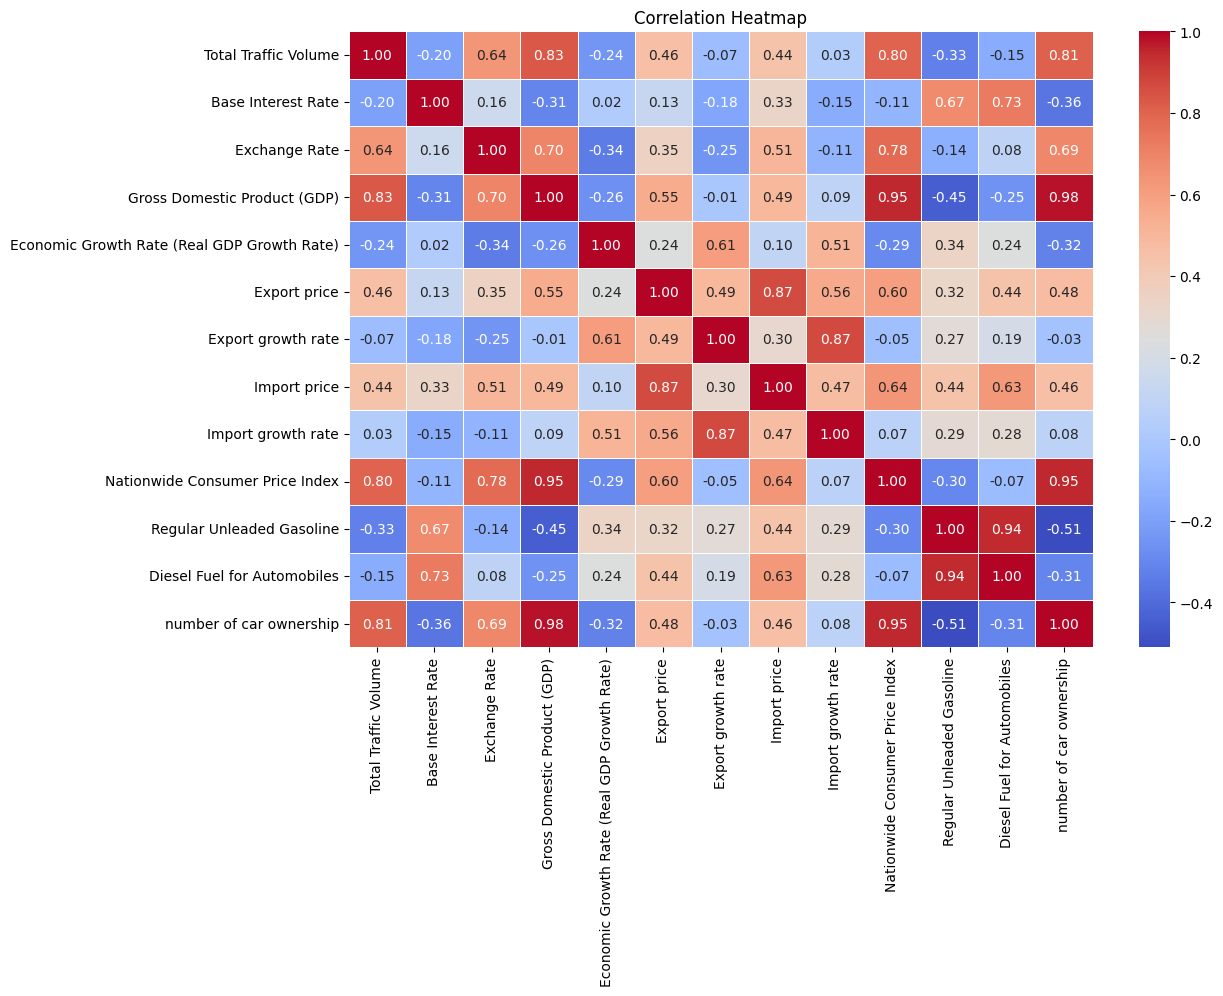

In [28]:
# Select only numeric type data
df_cleaned = data.select_dtypes(include=['number'])

# Calculation of correlation matrix
corr_matrix = df_cleaned.corr()

# Draw a heat map
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [29]:
#GDP, Nationwide Consuer Index, number of ownership 높은 상관관계

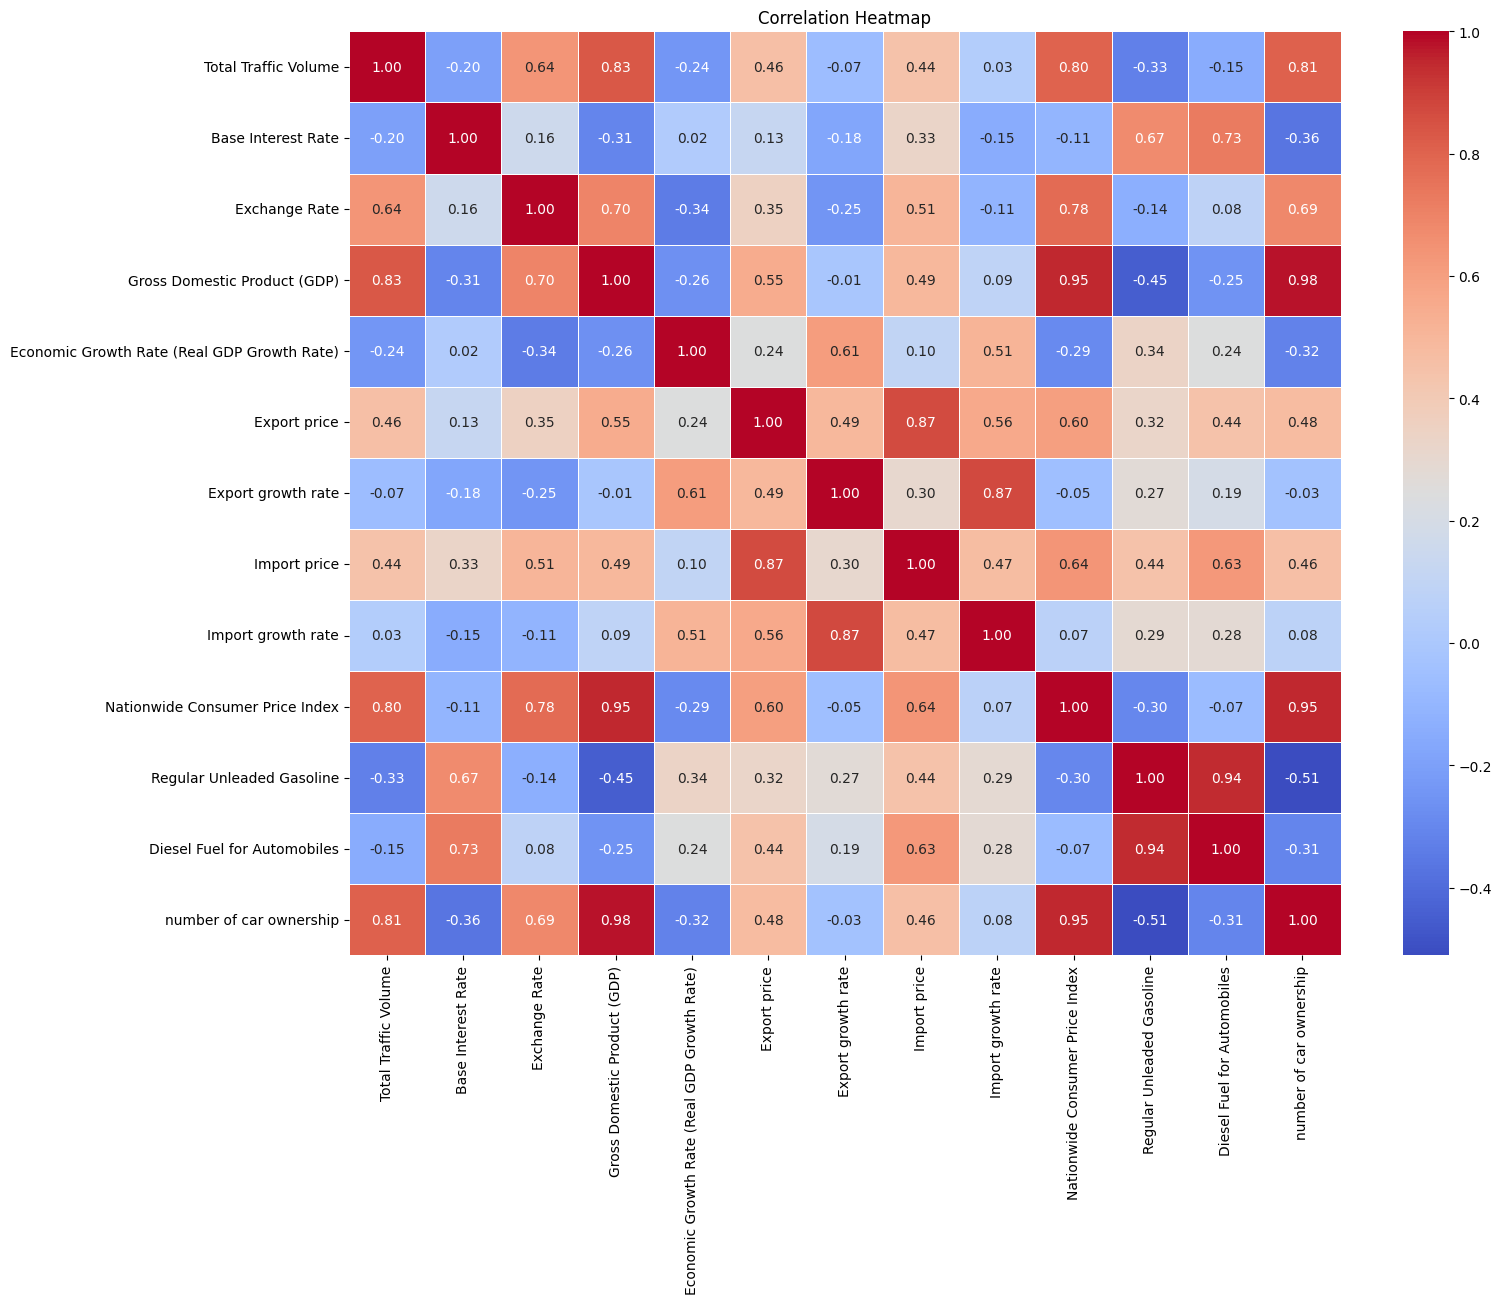

In [30]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Create a DataFrame with the normalized data
scaled_df = pd.DataFrame(scaled_data, index=df_cleaned.index, columns=df_cleaned.columns)

# Calculate the correlation matrix
correlation_matrix = scaled_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [31]:
# Correlation before and after Scaling remains unchanged

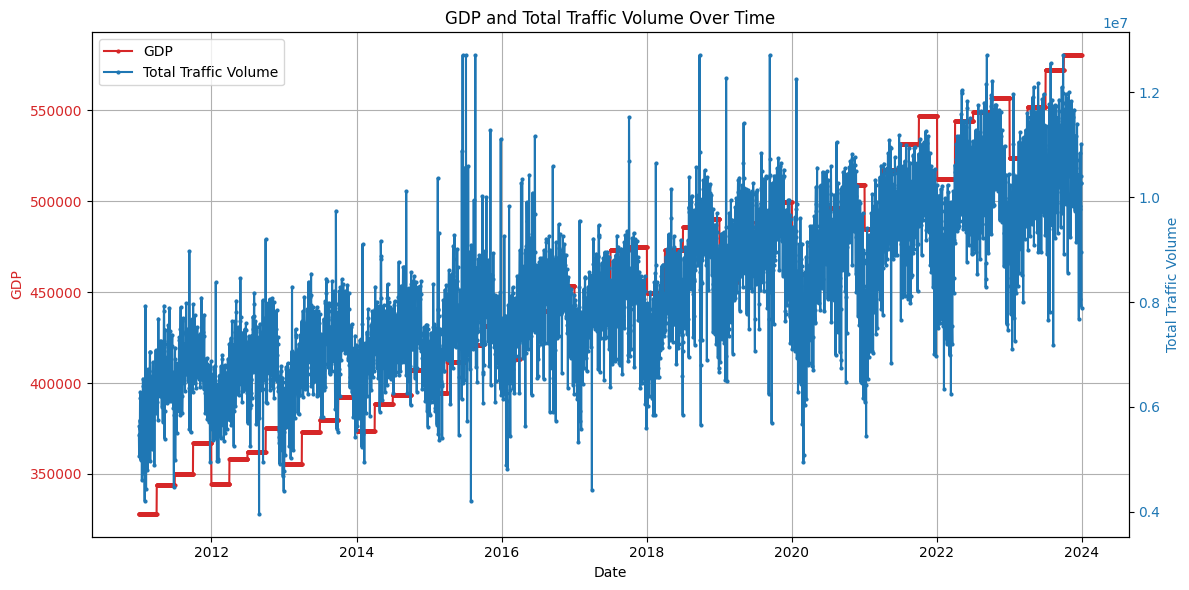

In [32]:
# Create a plot with two different y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting GDP on the primary y-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('GDP', color=color)
ax1.plot(data['Date'], data['Gross Domestic Product (GDP)'], label='GDP', color=color, marker='o', linestyle='-', markersize=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Creating a second y-axis for the Total Traffic Volume
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Total Traffic Volume', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Date'], data['Total Traffic Volume'], label='Total Traffic Volume', color=color, marker='o', linestyle='-', markersize=2)
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('GDP and Total Traffic Volume Over Time')
fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Adding legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

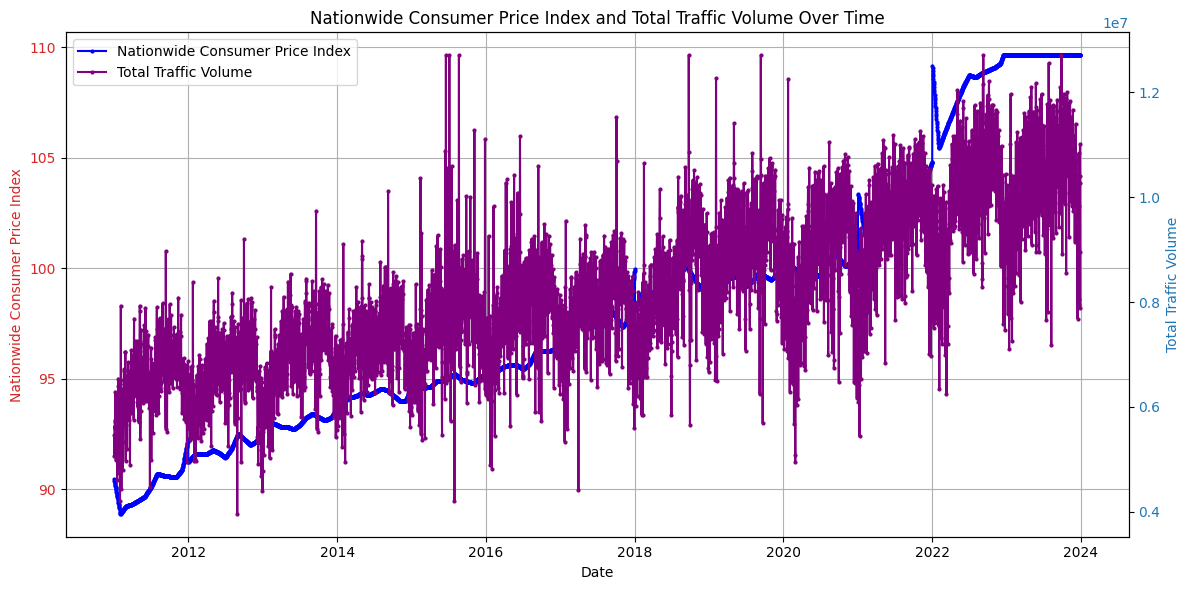

In [33]:
# Create a plot with two different y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Nationwide Consumer Price Index on the primary y-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Nationwide Consumer Price Index', color=color)
ax1.plot(data['Date'], data['Nationwide Consumer Price Index'], label='Nationwide Consumer Price Index', color='blue', marker='o', linestyle='-', markersize=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Creating a second y-axis for the Total Traffic Volume
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Total Traffic Volume', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Date'], data['Total Traffic Volume'], label='Total Traffic Volume', color='purple', marker='o', linestyle='-', markersize=2)
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Nationwide Consumer Price Index and Total Traffic Volume Over Time')
fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Adding legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

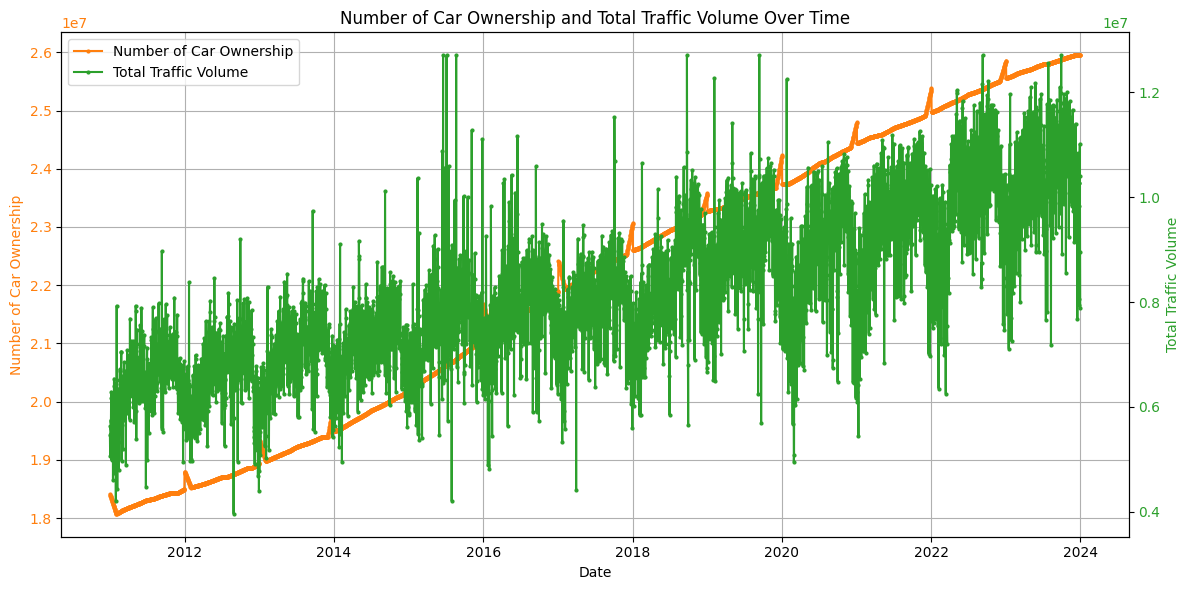

In [34]:
# Create a plot with two different y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Number of Car Ownership on the primary y-axis
color = 'tab:orange'
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Car Ownership', color=color)
ax1.plot(data['Date'], data['number of car ownership'], label='Number of Car Ownership', color=color, marker='o', linestyle='-', markersize=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Creating a second y-axis for the Total Traffic Volume
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Total Traffic Volume', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Date'], data['Total Traffic Volume'], label='Total Traffic Volume', color=color, marker='o', linestyle='-', markersize=2)
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Number of Car Ownership and Total Traffic Volume Over Time')
fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Adding legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

In [35]:
# Filter the data to keep only entries before January 1, 2020
df_before_2020 = data[data['Date'] < '2020-01-01']

# Drop any rows where 'date' is NaN
df_before_2020.dropna(subset=['Date'], inplace=True)
df_before_2020

C:\Users\jinsung\AppData\Local\Temp\ipykernel_25760\2780261521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before_2020.dropna(subset=['Date'], inplace=True)


,Date,Total Traffic Volume,Base Interest Rate,Exchange Rate,Gross Domestic Product (GDP),Economic Growth Rate (Real GDP Growth Rate),Export price,Export growth rate,Import price,Import growth rate,Nationwide Consumer Price Index,Regular Unleaded Gasoline,Diesel Fuel for Automobiles,number of car ownership
0,2011-01-01,5466446.0,2.75,1121.500000,328096.0,5.4,44465366.00,44.700000,41981323.00,13.600000,90.448000,1814.57,1611.14,18409608
1,2011-01-02,5059821.0,2.75,1121.732258,328096.0,5.4,44269519.60,43.775943,41799132.37,13.521635,90.397806,1815.24,1611.79,18398782
2,2011-01-03,5631394.0,2.75,1121.964516,328096.0,5.4,44073673.20,42.851885,41616941.74,13.443269,90.347613,1816.15,1612.85,18387956
3,2011-01-04,5584995.0,2.75,1122.196774,328096.0,5.4,43877826.79,41.927828,41434751.11,13.364904,90.297419,1817.48,1614.02,18377130
4,2011-01-05,5742955.0,2.75,1122.429032,328096.0,5.4,43681980.39,41.003771,41252560.48,13.286539,90.247226,1818.53,1615.00,18366304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,2019-12-27,9590389.0,1.25,1183.806452,499344.0,2.7,45413812.48,-5.428987,43591252.53,-1.256415,100.006226,1554.82,1389.21,24121427
3281,2019-12-28,8998735.0,1.25,1184.948387,499344.0,2.7,45330050.44,-5.471435,43559601.78,-1.406615,100.018193,1555.46,1389.74,24139930
3282,2019-12-29,7359058.0,1.25,1186.090323,499344.0,2.7,45246288.40,-5.513882,43527951.02,-1.556815,100.030161,1556.18,1390.22,24158433
3283,2019-12-30,9049878.0,1.25,1187.232258,499344.0,2.7,45162526.36,-5.556330,43496300.26,-1.707015,100.042129,1556.80,1390.58,24176935


In [36]:
# Save the filtered data to a new CSV file
# df_before_2020.to_csv('../data/complete_b2020.csv', index=False)

In [37]:
# Analysis by dividing it into before and after COVID-19 (2020 basis)

In [38]:
# Filter the data to keep only entries before January 1, 2020
df_before_2020 = data[data['Date'] < '2020-01-01']

# Drop any rows where 'date' is NaN
df_before_2020.dropna(subset=['Date'], inplace=True)
df_before_2020

C:\Users\jinsung\AppData\Local\Temp\ipykernel_25760\2780261521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before_2020.dropna(subset=['Date'], inplace=True)


,Date,Total Traffic Volume,Base Interest Rate,Exchange Rate,Gross Domestic Product (GDP),Economic Growth Rate (Real GDP Growth Rate),Export price,Export growth rate,Import price,Import growth rate,Nationwide Consumer Price Index,Regular Unleaded Gasoline,Diesel Fuel for Automobiles,number of car ownership
0,2011-01-01,5466446.0,2.75,1121.500000,328096.0,5.4,44465366.00,44.700000,41981323.00,13.600000,90.448000,1814.57,1611.14,18409608
1,2011-01-02,5059821.0,2.75,1121.732258,328096.0,5.4,44269519.60,43.775943,41799132.37,13.521635,90.397806,1815.24,1611.79,18398782
2,2011-01-03,5631394.0,2.75,1121.964516,328096.0,5.4,44073673.20,42.851885,41616941.74,13.443269,90.347613,1816.15,1612.85,18387956
3,2011-01-04,5584995.0,2.75,1122.196774,328096.0,5.4,43877826.79,41.927828,41434751.11,13.364904,90.297419,1817.48,1614.02,18377130
4,2011-01-05,5742955.0,2.75,1122.429032,328096.0,5.4,43681980.39,41.003771,41252560.48,13.286539,90.247226,1818.53,1615.00,18366304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,2019-12-27,9590389.0,1.25,1183.806452,499344.0,2.7,45413812.48,-5.428987,43591252.53,-1.256415,100.006226,1554.82,1389.21,24121427
3281,2019-12-28,8998735.0,1.25,1184.948387,499344.0,2.7,45330050.44,-5.471435,43559601.78,-1.406615,100.018193,1555.46,1389.74,24139930
3282,2019-12-29,7359058.0,1.25,1186.090323,499344.0,2.7,45246288.40,-5.513882,43527951.02,-1.556815,100.030161,1556.18,1390.22,24158433
3283,2019-12-30,9049878.0,1.25,1187.232258,499344.0,2.7,45162526.36,-5.556330,43496300.26,-1.707015,100.042129,1556.80,1390.58,24176935


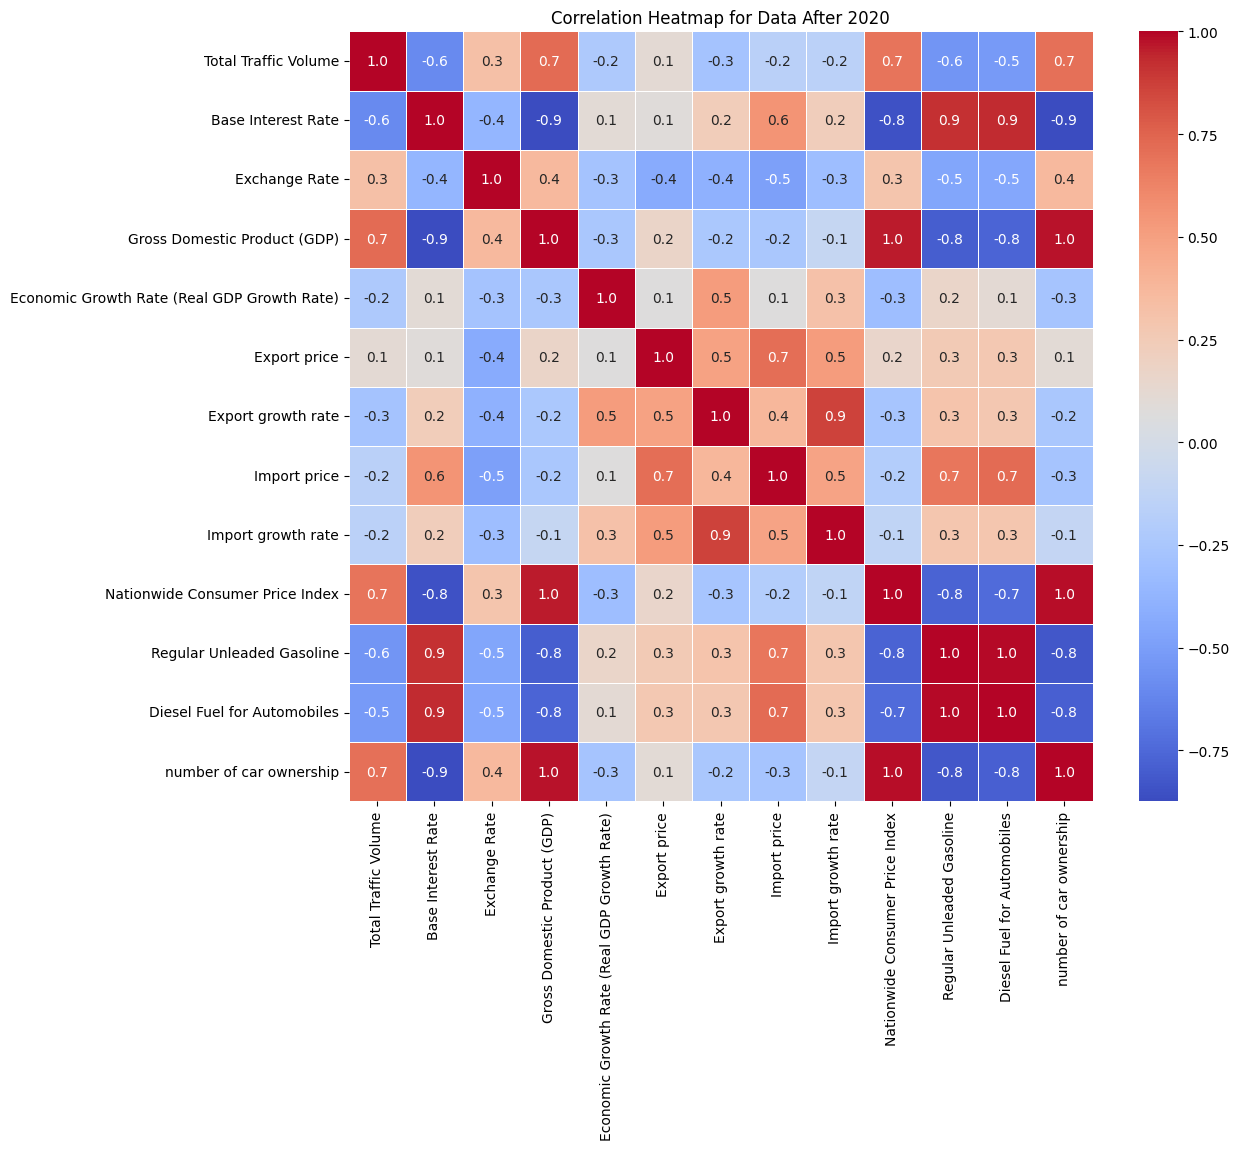

In [39]:
# Select only numeric columns for the correlation matrix, excluding specified columns

numeric_cols = df_before_2020.select_dtypes(include=[np.number])
# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidths=.5, cmap='coolwarm')
plt.title('Correlation Heatmap for Data After 2020')
plt.show()

In [40]:
# Filter the data to keep only entries before January 1, 2020
df_after_2020 = data[data['Date'] >= '2020-01-01']

# Drop any rows where 'date' is NaN
df_after_2020.dropna(subset=['Date'], inplace=True)
df_after_2020

C:\Users\jinsung\AppData\Local\Temp\ipykernel_25760\2560253184.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2020.dropna(subset=['Date'], inplace=True)


,Date,Total Traffic Volume,Base Interest Rate,Exchange Rate,Gross Domestic Product (GDP),Economic Growth Rate (Real GDP Growth Rate),Export price,Export growth rate,Import price,Import growth rate,Nationwide Consumer Price Index,Regular Unleaded Gasoline,Diesel Fuel for Automobiles,number of car ownership
3285,2020-01-01,7584238.0,1.25,1189.516129,499344.0,2.7,44995002.29,-5.641226,43432998.74,-2.007415,100.066064,1557.74,1391.19,24213940
3286,2020-01-02,8524862.0,1.25,1190.658065,499344.0,2.7,44911240.25,-5.683674,43401347.98,-2.157615,100.078032,1558.44,1391.59,24232443
3287,2020-01-03,9285648.0,1.25,1191.800000,459774.0,1.4,44827478.21,-5.726122,43369697.23,-2.307815,100.180000,1559.60,1392.26,23730286
3288,2020-01-04,8540853.0,1.25,1192.506452,459774.0,1.4,44743716.17,-5.768570,43338046.47,-2.458016,100.179355,1560.36,1392.88,23730708
3289,2020-01-05,7096075.0,1.25,1193.212903,459774.0,1.4,44659954.13,-5.811017,43306395.71,-2.608216,100.178710,1561.05,1393.16,23731131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2023-12-27,10276694.0,3.50,1324.077419,580296.0,1.4,57178995.45,5.450600,52902442.04,-11.037139,109.631118,1583.53,1501.33,25949201
4742,2023-12-28,10408581.0,3.50,1325.580645,580296.0,1.4,57244695.04,5.375500,52939177.37,-11.014283,109.631118,1582.63,1500.25,25949201
4743,2023-12-29,11018411.0,3.50,1327.083871,580296.0,1.4,57310394.63,5.300400,52975912.69,-10.991426,109.631118,1581.89,1499.03,25949201
4744,2023-12-30,8958402.0,3.50,1328.587097,580296.0,1.4,57376094.22,5.225300,53012648.02,-10.968570,109.631118,1581.22,1498.23,25949201


In [41]:
# Save the filtered data to a new CSV file
# df_after_2020.to_csv('../data/complete_a2020.csv', index=False)

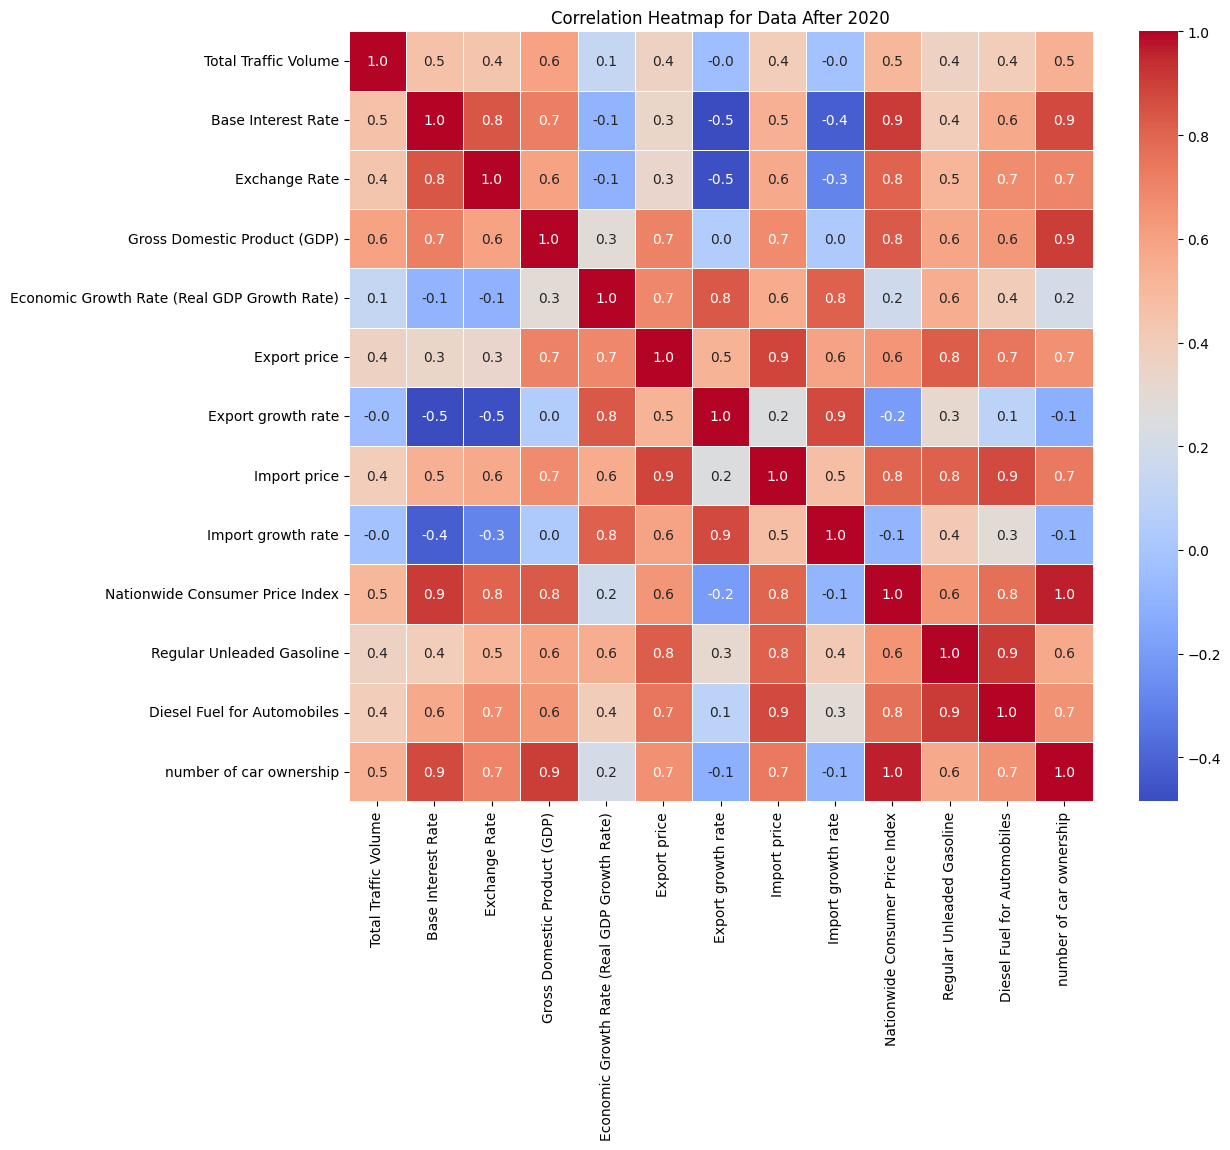

In [42]:
# Select only numeric columns for the correlation matrix, excluding specified columns

numeric_cols = df_after_2020.select_dtypes(include=[np.number])
# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidths=.5, cmap='coolwarm')
plt.title('Correlation Heatmap for Data After 2020')
plt.show()

In [43]:
# 2020년 이후 경제변수들은 교통량과는 유의미한 상관관계가 없다

#전체 연관관계 : Car register,Import growth rate, Export growth rate
#코로나 전 연관관계 : GDP, Car register, Customer price, ,Export growth ratem
#Import growth rate